In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [4]:
dataset_path = '/content/drive/MyDrive/pythondersleri/Natural Disasters'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255.0,
    validation_split=0.2,
)

In [6]:
train_dataset = dataset_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    subset='training',
)

test_dataset = dataset_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    subset='validation',
)

Found 1604 images belonging to 10 classes.
Found 396 images belonging to 10 classes.


In [7]:
# model

base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
)

for layer in base_model.layers:
    layer.trainable=False

In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(
    train_dataset,
    steps_per_epoch=(len(train_dataset)),
    epochs=50,
    validation_data=(test_dataset),
    validation_steps=(len(test_dataset)),
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 1419s 43s/step - accuracy: 0.4232 - loss: 1.9133 - val_accuracy: 0.7197 - val_loss: 0.8667
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 911ms/step - accuracy: 0.7810 - loss: 0.6933 - val_accuracy: 0.7500 - val_loss: 0.8721
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 911ms/step - accuracy: 0.7871 - loss: 0.6788 - val_accuracy: 0.7727 - val_loss: 0.7948
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 915ms/step - accuracy: 0.8402 - loss: 0.5473 - val_accuracy: 0.7626 - val_loss: 0.8252
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 945ms/step - accuracy: 0.8334 - loss: 0.5384 - val_accuracy: 0.7879 - val_loss: 0.7498
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 909ms/step - accuracy: 0.8588 - loss: 0.4588 - val_accuracy: 0.7500 - val_l

In [11]:
model.evaluate(test_dataset)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 857ms/step - accuracy: 0.7718 - loss: 0.8407


[0.786521852016449, 0.7853535413742065]

In [12]:
def load_img_processor(image_path):
    image = load_img(image_path, target_size=(224,224))
    image_arr = img_to_array(image)
    image_arr = image_arr / 255.0
    image_arr = image_arr.reshape(1, 224, 224, 3)
    return image_arr

def predict_display(image_path):
    processed_image = load_img_processor(image_path)
    prediction = model.predict(processed_image)

    class_label = np.argmax(prediction)

    label = list(test_dataset.class_indices.keys())

    plt.title(f'predicted : {label[class_label]}')
    plt.imshow(load_img(image_path, target_size=(224,224)))
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


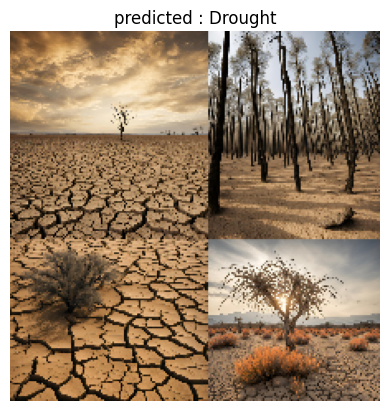

In [13]:
image = '/content/drive/MyDrive/Data Seience/Proje4/Kuraklık.png'

predict_display(image)

In [14]:
print(test_dataset.class_indices)

{'Avalanche': 0, 'Drought': 1, 'Earthquake': 2, 'Flood': 3, 'Hurricane_Typhoon': 4, 'Landslide': 5, 'Tornado': 6, 'Tsunami': 7, 'Volcanic_Eruption': 8, 'Wildfires': 9}


In [ ]:
print(test_dataset.class_indices.keys())

dict_keys(['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo'])


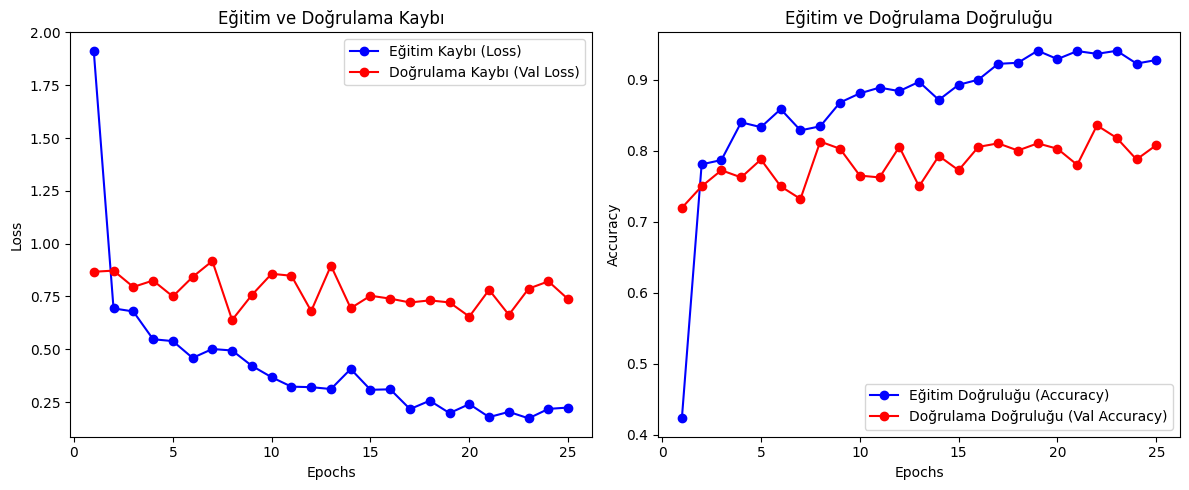

In [18]:
import matplotlib.pyplot as plt

# Eğitimden alınan değerleri elle kaydedin
train_loss = [1.9133, 0.6933, 0.6788, 0.5473, 0.5384, 0.4588, 0.5010, 0.4939, 0.4212, 0.3673, 0.3227, 0.3203, 0.3115, 0.4063, 0.3079, 0.3101, 0.2165, 0.2563, 0.1975, 0.2402, 0.1785, 0.2034, 0.1727, 0.2174, 0.2238]
val_loss = [0.8667, 0.8721, 0.7948, 0.8252, 0.7498, 0.8419, 0.9176, 0.6384, 0.7568, 0.8571, 0.8478, 0.6806, 0.8956, 0.6943, 0.7532, 0.7394, 0.7213, 0.7312, 0.7215, 0.6544, 0.7812, 0.6628, 0.7868, 0.8213, 0.7368]
train_accuracy = [0.4232, 0.7810, 0.7871, 0.8402, 0.8334, 0.8588, 0.8289, 0.8346, 0.8681, 0.8810, 0.8891, 0.8842, 0.8973, 0.8718, 0.8931, 0.9003, 0.9226, 0.9241, 0.9411, 0.9293, 0.9406, 0.9367, 0.9410, 0.9230, 0.9280]
val_accuracy = [0.7197, 0.7500, 0.7727, 0.7626, 0.7879, 0.7500, 0.7323, 0.8131, 0.8030, 0.7652, 0.7626, 0.8056, 0.7500, 0.7929, 0.7727, 0.8056, 0.8106, 0.8005, 0.8106, 0.8030, 0.7803, 0.8359, 0.8182, 0.7879, 0.8081]

# Epoch sayısını belirleyin
epochs = range(1, len(train_loss) + 1)

# Loss grafiği çizimi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-o', label='Eğitim Kaybı (Loss)')
plt.plot(epochs, val_loss, 'r-o', label='Doğrulama Kaybı (Val Loss)')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiği çizimi
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-o', label='Eğitim Doğruluğu (Accuracy)')
plt.plot(epochs, val_accuracy, 'r-o', label='Doğrulama Doğruluğu (Val Accuracy)')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Grafikleri göster
plt.tight_layout()
plt.show()


In [19]:

model.save("MobileNetV2.h5")


In [20]:

model.save("MobileNetV2.keras")
